# **복합 SCFI 예측 전처리 7 단계**

아래 파일을 업로드 한다.

복합SCFI_2021-09.xlsx

외부기관의 중국수출량, 명목선복량, 미국외래관광객에 대한 전망.xlsx

복합SCFI2014_2023.xlsx

최종적으로 아래 파일 생성하고 이 파일을 가지고 모형을 개발한다.

전처리_SCFI.xlsx

# (단계 1)
여기에는 두 가지 주요 데이터 세트가 포함되어 있으며 각각 실적 데이터와 전망 데이터로 구분됩니다.
1)	실적 데이터 세트:
기간: 2014년 1월부터 2021년 9월까지
데이터 포함 내용:  YYYYMM: 년월 (예: "2014-01"), 문자열 포맷 "YYYY-MM", CH_EXP: 중국 수출량, FLEET_DEV: 명목선복량, CNTR_TIMECHART: 용선료, WTI: 유가, R_GDP_WORLD: 글로벌 실질 GDP, DEFLATOR_WORLD: 글로벌 물가, R_GDP_USA: 미국 실질 GDP, CLI_USA: 미국 경기선행지수, PMI_US: 미국 구매자관리지수, DEFLATOR_USA: 미국 물가, G_RELI: 선박의 글로벌 정시성, G_DELAY: 선박의 글로벌 지연일수, INT_TOURIST_US: 미국 외래 관광객 수, SCFI_C: 복합 SCFI
2)	전망 데이터 세트:
기간: 2021년 4분기부터 2023년 1분기까지
데이터 포함 내용: CH_EXP: 중국 수출량 (분기별), FLEET_DEV: 명목선복량 (분기별), INT_TOURIST_US:미국 외래 관광객 수 (분기별)
두 데이터 세트는 현재 분리된 상태로 유지하며, 실적 데이터와 전망 데이터로 구분되어 있습니다. 각 데이터의 필드는 YYYY-MM 형태의 년월로 구분하며, 2021년 10월을 기점으로 그 이전은 실적, 이후는 전망으로 처리합니다. 데이터 분석 시 이 구분을 명확히 하여 분석에 반영해야 할 것입니다.

In [2]:
import pandas as pd

# Load the first file to examine its contents
file_path1 = "/content/sample_data/복합SCFI_2021-09.xlsx"
data1 = pd.read_excel(file_path1)

# Display the first few rows and the columns of the first file
data1.head(), data1.columns

(    YYYYMM    CH_EXP  FLEET_DEV  CNTR_TIMECHART    WTI   R_GDP_WORLD  \
 0  2014-01  21790540   17312194        46.79983   94.6  1.787676e+07   
 1  2014-02   9977430   17385239        46.71077  100.8  1.791018e+07   
 2  2014-03  17115050   17367549        46.70015  100.8  1.794359e+07   
 3  2014-04  20089670   17534040        47.20250  102.1  1.799153e+07   
 4  2014-05  20500550   17701139        46.95479  102.2  1.803947e+07   
 
    DEFLATOR_WORLD    R_GDP_USA   CLI_USA  PMI_US  DEFLATOR_USA    G_RELI  \
 0      109.776667  4173.316667  100.7090    53.7    102.690000  0.694882   
 1      110.063333  4168.433333  100.7202    57.1    102.830000  0.681136   
 2      110.350000  4163.550000  100.7613    55.5    102.970000  0.721154   
 3      110.543333  4181.376667  100.8148    55.4    103.163333  0.732795   
 4      110.736667  4199.203333  100.8649    56.4    103.356667  0.753047   
 
     G_DELAY    SCFI_C  INT_TOURIST_US  
 0  3.948304  1174.866            5.40  
 1  4.267981  

In [3]:
# Load the second file to examine its contents
file_path2 = "/content/sample_data/외부기관의 중국수출량, 명목선복량, 미국외래관광객에 대한 전망.xlsx"
data2 = pd.read_excel(file_path2)

# Display the first few rows and the columns of the second file
data2.head(), data2.columns


(   YEAR QUARTER    CH_EXP  FLEET_DEV  INT_TOURIST_US
 0  2021      4Q  27900000   24000000            2.79
 1  2022      1Q  25100000   24800000            2.67
 2  2022      2Q  28100000   25100000            4.24
 3  2022      3Q  27000000   24800000            5.26
 4  2022      4Q  25800000   25100000            4.92,
 Index(['YEAR', 'QUARTER', 'CH_EXP', 'FLEET_DEV', 'INT_TOURIST_US'], dtype='object'))

# (단계 2)
1)	데이터 형식 유지:
모든 YYYYMM 필드는 "YYYY-MM"의 문자형으로 저장하고 유지해야 합니다. 예를 들어 "2014-01"과 같이 처리합니다.
이 형식은 실적 데이터와 전망 데이터 모두에 적용됩니다.
2)	분기별 데이터를 월별 데이터로 변환:
2021년 4분기부터 2023년 1분기까지의 분기별 전망 데이터를 월별 데이터로 변환합니다.
변환된 데이터는 각 분기의 첫 달 값이 해당 분기의 모든 월에 적용됩니다. 예를 들어, 2021년 4분기의 데이터는 2021년 10월, 11월, 12월 모두에 적용됩니다.
3)	데이터 결합:
실적 데이터와 전망 데이터를 결합하여 하나의 테이블로 만듭니다.
결합 과정에서는 YYYYMM 필드를 키(key)로 사용하여 데이터가 올바르게 맞춰져 있는지 확인합니다.
결합된 데이터는 중국 수출량(CH_EXP), 명목선복량(FLEET_DEV), 미국 외래 관광객(INT_TOURIST_US)에 대한 정보를 포함해야 합니다.
4)	결합 데이터의 검증:
YYYYMM 필드가 모든 데이터 레코드에서 "YYYY-MM" 형식으로 일관되게 유지되었는지 확인합니다.
결합한 데이터 테이블을 MART 테이블로 명명하고, 결측치가 없는지 확인합니다.
5)	결과 저장:
최종 MART 테이블을 “2단계.xlsx” 파일로 저장합니다.

In [4]:
# 에러 수정
# 주어진 파일에서 데이터를 로드하고, 분기별 데이터를 월별 데이터로 변환하여 새로운 DataFrame을 생성합니다.
# 모든 행을 먼저 리스트에 추가하고, 한 번에 pd.DataFrame() 생성자를 사용하여 DataFrame을 생성합니다.
# 이 방법은 성능을 향상시키고, append() 사용으로 인한 문제를 방지합니다.

# 분기별 데이터를 월별 데이터로 변환
quarter_to_month = {
    '1Q': ['-01', '-02', '-03'],
    '2Q': ['-04', '-05', '-06'],
    '3Q': ['-07', '-08', '-09'],
    '4Q': ['-10', '-11', '-12']
}

# 새 DataFrame 생성을 위한 준비
monthly_forecasts = []

# 데이터 변환
for index, row in data2.iterrows():
    year = row['YEAR']
    quarters = quarter_to_month[row['QUARTER']]
    for month_suffix in quarters:
        new_row = row.copy()
        new_row['YYYYMM'] = f"{year}{month_suffix}"
        monthly_forecasts.append(new_row)

# 리스트에서 DataFrame 생성
monthly_forecast = pd.DataFrame(monthly_forecasts)

# 필요한 컬럼만 선택하고 YYYYMM 기준으로 정렬
monthly_forecast = monthly_forecast[['YYYYMM', 'CH_EXP', 'FLEET_DEV', 'INT_TOURIST_US']].sort_values(by='YYYYMM')

# 결과 출력
monthly_forecast.head()



,YYYYMM,CH_EXP,FLEET_DEV,INT_TOURIST_US
0,2021-10,27900000,24000000,2.79
0,2021-11,27900000,24000000,2.79
0,2021-12,27900000,24000000,2.79
1,2022-01,25100000,24800000,2.67
1,2022-02,25100000,24800000,2.67


In [5]:
import re
# Ensure the actual data date format is correct (although it should already be in the correct format)
data1['YYYYMM'] = pd.to_datetime(data1['YYYYMM']).dt.strftime('%Y-%m')

# Merge the actual data and the forecast data
combined_data = pd.merge(data1[['YYYYMM', 'CH_EXP', 'FLEET_DEV', 'INT_TOURIST_US']],
                         monthly_forecast,
                         on='YYYYMM',
                         how='outer',
                         suffixes=('_actual', '_forecast'))

# Fill NaN values in forecast columns with actual data and vice versa
for col in ['CH_EXP', 'FLEET_DEV', 'INT_TOURIST_US']:
    combined_data[col] = combined_data[col + '_actual'].fillna(combined_data[col + '_forecast'])
    combined_data.drop([col + '_actual', col + '_forecast'], axis=1, inplace=True)

# Verify date format consistency and check for missing values
date_format_consistent = combined_data['YYYYMM'].apply(lambda x: bool(re.match(r"\d{4}-\d{2}", x))).all()
missing_data_check = combined_data.isnull().sum()

combined_data.head(), date_format_consistent, missing_data_check


(    YYYYMM      CH_EXP   FLEET_DEV  INT_TOURIST_US
 0  2014-01  21790540.0  17312194.0            5.40
 1  2014-02   9977430.0  17385239.0            4.66
 2  2014-03  17115050.0  17367549.0            5.90
 3  2014-04  20089670.0  17534040.0            6.50
 4  2014-05  20500550.0  17701139.0            6.37,
 True,
 YYYYMM            0
 CH_EXP            0
 FLEET_DEV         0
 INT_TOURIST_US    0
 dtype: int64)

In [6]:
# Recheck the date format consistency using the corrected 're' import
date_format_consistent = combined_data['YYYYMM'].apply(lambda x: bool(re.match(r"\d{4}-\d{2}", x))).all()
missing_data_check = combined_data.isnull().sum()

combined_data.head(), date_format_consistent, missing_data_check


(    YYYYMM      CH_EXP   FLEET_DEV  INT_TOURIST_US
 0  2014-01  21790540.0  17312194.0            5.40
 1  2014-02   9977430.0  17385239.0            4.66
 2  2014-03  17115050.0  17367549.0            5.90
 3  2014-04  20089670.0  17534040.0            6.50
 4  2014-05  20500550.0  17701139.0            6.37,
 True,
 YYYYMM            0
 CH_EXP            0
 FLEET_DEV         0
 INT_TOURIST_US    0
 dtype: int64)

In [7]:
# Save the combined data to an Excel file
output_file_path = "/content/sample_data/2단계.xlsx"
combined_data.to_excel(output_file_path, index=False)

output_file_path


'/content/sample_data/2단계.xlsx'

# (단계 3-1)
1)	데이터 확보
선박의 글로벌 정시성(G_RELI)의 과거 실적은 “복합SCFI_2021-09 .xlsx”에 있다.
2023년 3월 미국 외래 관광객의 예측치는 “2단계.xlsx”에 있다.
2)	기초 데이터 계산:
B는 2014년부터 2019년까지의 선박의 글로벌 정시성 평균입니다.
F는 2023년 3월 미국 외래 관광객의 예측치입니다. “2단계.xlsx”에 산출
A는 2014년부터 2019년까지 미국 외래 관광객의 평균입니다.
X%는 F가 A에 대해 차지하는 비율입니다.
K는 B에 X%를 적용한 값으로, 2023년 3월 선박의 글로벌 정시성 예측치입니다.
3)	2차 함수 구성
선박의 글로벌 정시성을 전망하는 2차 함수는 다음과 같이 설정됩니다:
최저점인 2021년 9월(x=0)에서 y=0.339 (선박의 글로벌 정시성의 최저값)
2023년 3월(x=18)에서 y=K (계산된 예측치)
이를 통해, 두 점(0.339, K)을 통과하는 2차항의 계수가 양수인 2차 함수의 함수를 구성하고, 2차 함수식을 화면에 표시한다.
4)	전망치 계산:
위에서 구한 2차 함수를 사용하여 2021년 10월부터 2023년 3월까지 각 월(x값)에 대해 선박의 글로벌 정시성을 계산합니다.
5)	선박의 글로벌 정시성 실적과 전망 통합
“복합SCFI_2021-09 .xlsx”에서 2014년 1월부터 2021년 9월까지 실적을 다시 읽어오고, 2차함수에서 계산한 2021년 10월부터 2023년 3월까지의 전망치를 별도 하나의 필드로 통합한다. 즉, 2014년 1월부터 2023년 3월까지 하나의 필드로 구성한 선박의 글로벌 정시성(임시 Z)하고 결측치가 없는지 확인한다.
6)	데이터 병합
2단계.xlsx 파일을 기본 테이블로 설정하고, 해당 범위(2014년 1월부터 2023년 2월까지)에 맞는 선박의 글로벌 정시성 데이터(임시 Z)를 왼쪽 병합(left join)으로 추가하여 갱신된 Mart 테이블을 구성합니다.
병합된 데이터에서 YYYYMM 필드가 "YYYY-MM" 형식으로 일관되게 유지되었는지 확인합니다.
결합된 데이터에 결측치가 없는지 확인하고, 예측 데이터의 키(key)가 정확하게 매칭되었는지 검증합니다.
7)	데이터 시각화:
갱신된 MART 테이블을 사용하여 미국 외래 관광객과 선박의 글로벌 정시성의 추이를 시각화합니다.
2014년 1월 이후 두 개의 그래프를 별도로 생성합니다: 하나는 미국 외래 관광객 추이(파란색), 다른 하나는 선박의 글로벌 정시성 추이(빨간색).
X축은 2014년 1월부터 년도(예: “2014”)만 표시하고, Y축은 각 데이터의 값을 표시합니다.
그래프는 한글이 깨지지 않도록 영문으로 표기합니다.
8)	사용자 입력 확인:
K값을 계산 결과를 제시한 후 사용자에게 계속 진행할지 여부를 확인합니다.

In [8]:
# Load the previously saved "2단계.xlsx" file to access the forecast data
step2_data = pd.read_excel("/content/sample_data/2단계.xlsx")

# Calculate B: Average of G_RELI from 2014 to 2019
B = data1[(data1['YYYYMM'] >= '2014-01') & (data1['YYYYMM'] <= '2019-12')]['G_RELI'].mean()

# Calculate A: Average of INT_TOURIST_US from 2014 to 2019
A = data1[(data1['YYYYMM'] >= '2014-01') & (data1['YYYYMM'] <= '2019-12')]['INT_TOURIST_US'].mean()

#Find F: Forecast of INT_TOURIST_US for March 2023
F = step2_data[step2_data['YYYYMM'] == '2023-03']['INT_TOURIST_US'].values[0]

# Calculate X%: Ratio of F to A
X_percent = F / A

# Calculate K: G_RELI forecast for March 2023 by applying X% to B
K = B * X_percent

B, A, F, X_percent, K

(0.7607057179305555,
 6.470972222222222,
 4.46,
 0.6892318258891202,
 0.5243025909335709)

In [9]:
from sympy import symbols, Eq, solve

# Define the symbols
x, y, a, b, c = symbols('x y a b c')

# Point conditions
point1 = (0, 0.339)  # September 2021
point2 = (18, K)     # March 2023

# Define the equations based on the quadratic function y = ax^2 + bx + c
eq1 = Eq(y, a * point1[0]**2 + b * point1[0] + c)  # Equation at x=0
eq2 = Eq(y, a * point2[0]**2 + b * point2[0] + c)  # Equation at x=18
eq3 = Eq(0, 2*a*point1[0] + b)  # Derivative at x=0 (minimum point)

# Substitute y values in equations
eq1_sub = eq1.subs(y, point1[1])
eq2_sub = eq2.subs(y, point2[1])

# Solve the equations for a, b, c
coefficients = solve((eq1_sub, eq2_sub, eq3), (a, b, c))
coefficients


{a: 0.000571921576955466, b: 0.0, c: 0.339000000000000}

In [10]:
# Define the quadratic function using the solved coefficients
def quadratic_function(x):
    return coefficients[a] * x**2 + coefficients[c]

# Calculate the months from October 2021 (x=1) to March 2023 (x=18)
months = range(1, 19)  # x values
g_reli_forecast = [quadratic_function(x) for x in months]

# Create a DataFrame for the forecast from October 2021 to March 2023
forecast_dates = pd.date_range(start='2021-10-01', periods=len(months), freq='M').strftime('%Y-%m').tolist()
forecast_g_reli = pd.DataFrame({
    'YYYYMM': forecast_dates,
    'G_RELI_forecast': g_reli_forecast
})

forecast_g_reli.head(), forecast_g_reli.tail()


(    YYYYMM    G_RELI_forecast
 0  2021-10  0.339571921576955
 1  2021-11  0.341287686307822
 2  2021-12  0.344147294192599
 3  2022-01  0.348150745231287
 4  2022-02  0.353298039423887,
      YYYYMM    G_RELI_forecast
 13  2022-11  0.451096629083271
 14  2022-12  0.467682354814980
 15  2023-01  0.485411923700599
 16  2023-02  0.504285335740130
 17  2023-03  0.524302590933571)

In [11]:
# Combine the actual G_RELI data from the initial dataset with the forecast data
actual_g_reli = data1[['YYYYMM', 'G_RELI']].copy()
combined_g_reli = pd.concat([actual_g_reli, forecast_g_reli.rename(columns={'G_RELI_forecast': 'G_RELI'})])

# Merge the combined G_RELI data with the step2_data (MART table)
mart_table_updated = pd.merge(step2_data, combined_g_reli, on='YYYYMM', how='left')

# Check for missing values and date format consistency
date_format_consistent_updated = mart_table_updated['YYYYMM'].apply(lambda x: bool(re.match(r"\d{4}-\d{2}", x))).all()
missing_data_check_updated = mart_table_updated.isnull().sum()

mart_table_updated.head(), date_format_consistent_updated, missing_data_check_updated


(    YYYYMM    CH_EXP  FLEET_DEV  INT_TOURIST_US    G_RELI
 0  2014-01  21790540   17312194            5.40  0.694882
 1  2014-02   9977430   17385239            4.66  0.681136
 2  2014-03  17115050   17367549            5.90  0.721154
 3  2014-04  20089670   17534040            6.50  0.732795
 4  2014-05  20500550   17701139            6.37  0.753047,
 True,
 YYYYMM            0
 CH_EXP            0
 FLEET_DEV         0
 INT_TOURIST_US    0
 G_RELI            0
 dtype: int64)

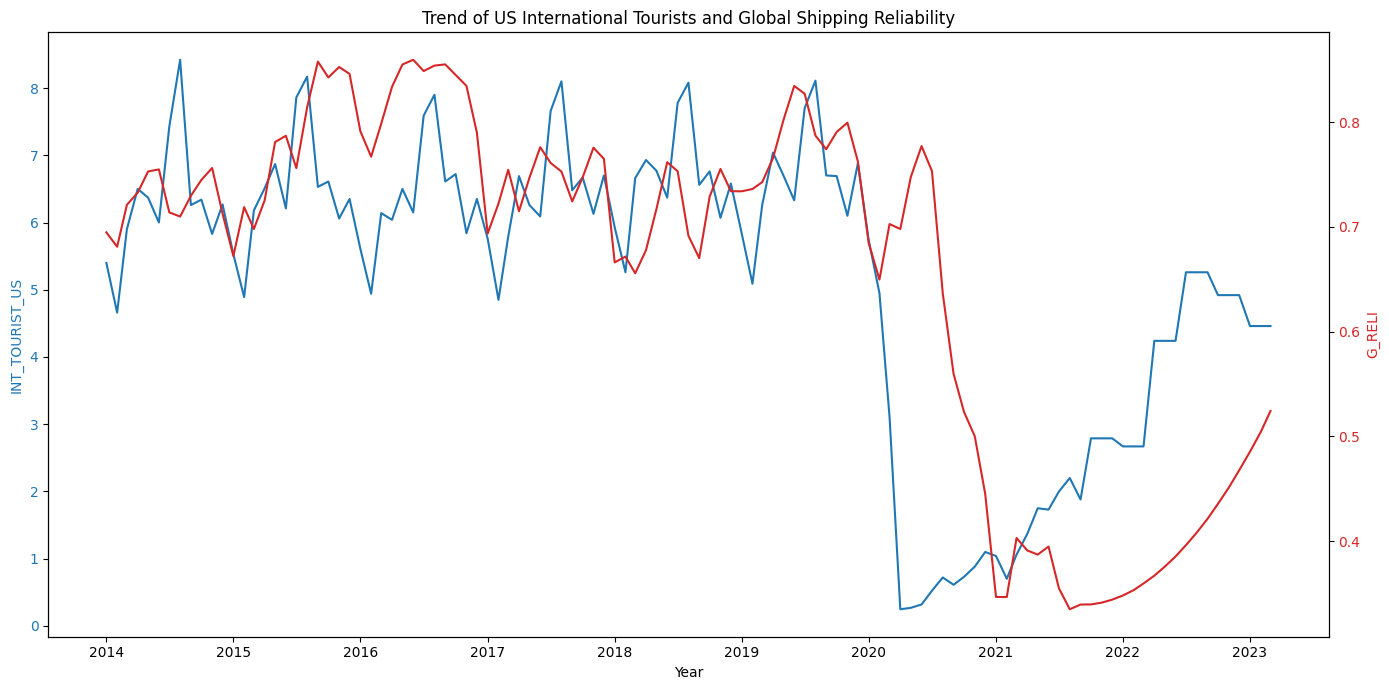

In [12]:
import matplotlib.pyplot as plt

# Prepare the data for plotting
plot_data = mart_table_updated[(mart_table_updated['YYYYMM'] >= '2014-01') & (mart_table_updated['YYYYMM'] <= '2023-03')]

# Convert YYYYMM to datetime for plotting
plot_data['Date'] = pd.to_datetime(plot_data['YYYYMM'])

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('INT_TOURIST_US', color=color)
ax1.plot(plot_data['Date'], plot_data['INT_TOURIST_US'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Trend of US International Tourists and Global Shipping Reliability')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('G_RELI', color=color)
ax2.plot(plot_data['Date'], plot_data['G_RELI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()



# (단계 4)
1)	데이터 형식 및 일관성 유지:
모든 데이터와 테이블의 YYYYMM 필드는 "YYYY-MM"의 문자형으로 저장하고 유지합니다. 데이터 병합 시 이 필드를 키로 사용하여 데이터의 일치성을 확인합니다.
2)	새 지표 정의 및 계산:
수요공급비율 (DEMAND_SUPPLY_RATIO): 이는 중국 수출량(CH_EXP)을 명목선복량(FLEET_DEV)으로 나눈 값입니다.
실선복량 (ACTUAL_SHIP_CAPACITY): 선박의 글로벌 정시성(G_RELI)과 명목선복량(FLEET_DEV)의 곱으로 계산됩니다.
3)	데이터 병합:
기존의 MART 테이블(선박의 글로벌 정시성, 중국 수출량, 명목선복량 정보를 포함)에 수요공급비율과 실선복량을 왼쪽 병합(left join)하여 갱신합니다.
2021년 10월 이후부터 2023년 3월까지의 전망치가 이미 계산된 수요공급비율과 실선복량의 전망치를 검증하여 갱신된 MART 테이블에 올바르게 병합되었는지 확인합니다.
4)	데이터 검증 및 저장:
갱신된 MART 테이블에서 결측치를 확인합니다.
데이터의 정확성과 병합의 정확성을 검증한 후, 사용자에게 진행 여부를 확인합니다.
모든 검증이 완료되면, 최종 데이터를 “4단계.xlsx”로 저장합니다.
5)	그래프 생성:
수요공급비율의 추이와 실선복량의 추이를 각각 별도의 그래프로 시각화합니다.
X축에는 2014년 1월부터 년도("2014", "2015", ..., "2023")만 간단히 표시하고, Y축은 각 데이터의 값으로 설정합니다.
그래프는 영문으로 제작하여 언어 깨짐을 방지합니다.


In [13]:
# Calculate new metrics: DEMAND_SUPPLY_RATIO and ACTUAL_SHIP_CAPACITY
mart_table_updated['DEMAND_SUPPLY_RATIO'] = mart_table_updated['CH_EXP'] / mart_table_updated['FLEET_DEV']
mart_table_updated['ACTUAL_SHIP_CAPACITY'] = mart_table_updated['G_RELI'] * mart_table_updated['FLEET_DEV']

# Verify the integration of the new metrics in the MART table
missing_data_check_final = mart_table_updated.isnull().sum()

mart_table_updated.head(), missing_data_check_final


(    YYYYMM    CH_EXP  FLEET_DEV  INT_TOURIST_US    G_RELI  \
 0  2014-01  21790540   17312194            5.40  0.694882   
 1  2014-02   9977430   17385239            4.66  0.681136   
 2  2014-03  17115050   17367549            5.90  0.721154   
 3  2014-04  20089670   17534040            6.50  0.732795   
 4  2014-05  20500550   17701139            6.37  0.753047   
 
    DEMAND_SUPPLY_RATIO ACTUAL_SHIP_CAPACITY  
 0             1.258682      12029930.086767  
 1             0.573902      11841708.152899  
 2             0.985461      12524674.756943  
 3             1.145752      12848858.226989  
 4             1.158149      13329796.028345  ,
 YYYYMM                  0
 CH_EXP                  0
 FLEET_DEV               0
 INT_TOURIST_US          0
 G_RELI                  0
 DEMAND_SUPPLY_RATIO     0
 ACTUAL_SHIP_CAPACITY    0
 dtype: int64)

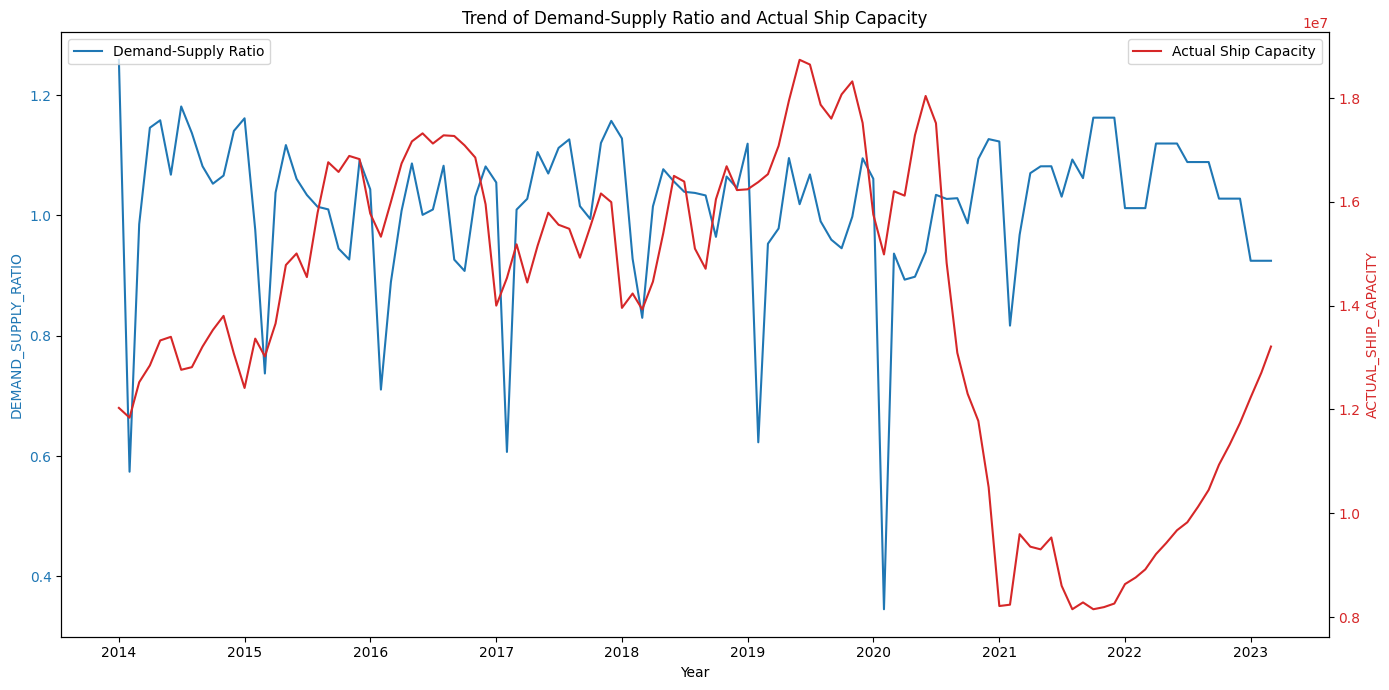

'/content/sample_data/4단계.xlsx'

In [14]:
# Save the updated MART table to an Excel file
final_output_file_path = "/content/sample_data/4단계.xlsx"
mart_table_updated.to_excel(final_output_file_path, index=False)

# Prepare the data for plotting
plot_data['DEMAND_SUPPLY_RATIO'] = plot_data['CH_EXP'] / plot_data['FLEET_DEV']
plot_data['ACTUAL_SHIP_CAPACITY'] = plot_data['G_RELI'] * plot_data['FLEET_DEV']

# Plotting the demand-supply ratio and actual ship capacity
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot for DEMAND_SUPPLY_RATIO
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('DEMAND_SUPPLY_RATIO', color=color)
ax1.plot(plot_data['Date'], plot_data['DEMAND_SUPPLY_RATIO'], color=color, label='Demand-Supply Ratio')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Trend of Demand-Supply Ratio and Actual Ship Capacity')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ACTUAL_SHIP_CAPACITY', color=color)
ax2.plot(plot_data['Date'], plot_data['ACTUAL_SHIP_CAPACITY'], color=color, label='Actual Ship Capacity')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

final_output_file_path



# **(단계 5)**
1)	데이터 형식 및 일관성 유지:
모든 데이터의 YYYYMM 필드는 "YYYY-MM"의 문자형으로 저장 및 유지합니다. 이 필드를 사용하여 데이터 병합 시 키(key)로 활용하며, 데이터의 형식 일관성을 확인합니다.
2)	새 지표 정의 및 계산:
	수요전망 (DEMAND_FORECAST): 중국 수출량(CH_EXP)을 기반으로 하며, 해당 월부터 다음 분기의 마지막 월까지의 데이터를 사용하여 단순 평균으로 계산합니다.
2-1) 분기 정의:
1분기: 1월, 2월, 3월, 2분기: 4월, 5월, 6월, 3분기: 7월, 8월, 9월, 4분기: 10월, 11월, 12월
2-2) 계산 규칙:
각 월에 대해 해당 월을 포함하고 다음 분기의 마지막 월까지 데이터를 사용합니다.
예를 들어, 2월의 데이터를 계산할 때는 2월부터 다음 분기인 2분기의 마지막인 6월까지의 데이터를 사용하여 평균을 산출합니다.


-	분기의 끝에 해당하는 월(9월, 10월, 11월)의 계산: 해당 연도의 다음 분기 데이터가 부족하거나 없는 경우, 다음 해의 1사분기 데이터를 사용합니다. 예를 들어, 2014년 10월과 11월의 데이터를 계산할 때는 2015년 1사분기 데이터를 사용합니다.
-	데이터 세트의 끝부분에 해당하는 월(2023년 1월, 2월, 3월)의 계산: 다음 분기의 데이터가 전혀 없는 경우, 해당 연도의 남은 분기 데이터만을 사용합니다. 예를 들어, 2023년 1월, 2월, 3월은 2023년 1사분기 데이터만 사용하여 평균을 계산합니다.
2-3) 데이터 사용:
각 월별로 실적 및 전망 데이터가 합쳐진 칼럼에서 필요한 데이터를 추출합니다.
실적 데이터는 2021년 9월 이전, 전망 데이터는 2021년 10월 이후의 데이터를 포함합니다.
2-4) 에러 방지:
각 계산 전, 해당 월의 데이터가 전체 기간 동안 존재하는지 확인합니다. 데이터 누락이나 업데이트가 발생하지 않도록 주의합니다.
	공급전망 (SUPPLY_FORECAST): 명목선복량(FLEET_DEV)을 참조하여 같은 방식으로 계산합니다.
3)	수요전망과 공급전망의 통합 확인:
수요전망과 공급전망 필드가 2014년 1월부터 2023년 3월까지 하나의 필드로 구성하고 결측치가 없는지 확인한다.
4)	데이터 병합 및 검증:
4단계.xlsx 파일을 기본 테이블로 설정하고, 수요전망 및 공급전망 데이터를 해당 파일에 왼쪽 병합(left join)하여 추가합니다.
병합 과정에서 실적 및 예측 데이터가 올바르게 결합되었는지, 특히 YYYYMM 필드의 형식이 일관되게 유지되었는지 확인합니다.
2021년 10월 이후의 전망치와 관련된 모든 데이터가 정확히 병합되었는지 검증합니다.
5)	수요전망 및 공급전망의 검증:
예를 들어, 2014년 2월의 수요전망과 공급전망 값을 계산하고, 이들 값이 각각 17,326,326 및 17,547,251인지 확인합니다.
6)	결측치 검사 및 진행 확인:
갱신된 MART 테이블에서 결측치 및 2014년 2월의 수요전망 17,326,326을 확인한 후, 사용자에게 진행 여부를 문의합니다.
7)	데이터 시각화:
수요전망과 공급전망 데이터를 기반으로 한 월별 추이를 나타내는 2개의 꺾은선 그래프를 생성합니다. X축에는 2014년 1월부터 년도("2014")만 표시하고, 그래프는 영문으로 작성하여 언어 깨짐을 방지합니다.


In [15]:
import pandas as pd

# Load the Excel file
file_path = '/content/sample_data/4단계.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe and the data types of the columns
data.head(), data.dtypes


(    YYYYMM    CH_EXP  FLEET_DEV  INT_TOURIST_US    G_RELI  \
 0  2014-01  21790540   17312194            5.40  0.694882   
 1  2014-02   9977430   17385239            4.66  0.681136   
 2  2014-03  17115050   17367549            5.90  0.721154   
 3  2014-04  20089670   17534040            6.50  0.732795   
 4  2014-05  20500550   17701139            6.37  0.753047   
 
    DEMAND_SUPPLY_RATIO  ACTUAL_SHIP_CAPACITY  
 0             1.258682          1.202993e+07  
 1             0.573902          1.184171e+07  
 2             0.985461          1.252467e+07  
 3             1.145752          1.284886e+07  
 4             1.158149          1.332980e+07  ,
 YYYYMM                   object
 CH_EXP                    int64
 FLEET_DEV                 int64
 INT_TOURIST_US          float64
 G_RELI                  float64
 DEMAND_SUPPLY_RATIO     float64
 ACTUAL_SHIP_CAPACITY    float64
 dtype: object)

In [16]:
# 코드 수정
# append() 함수는 pandas에서 더 이상 사용되지 않으며, 대신 pd.concat()을 사용하는 것이 권장됩니다.
#  각 월에 대해 다음 분기의 마지막까지의 평균을 계산하고, 모든 예측값을 리스트에 저장한 후, 이 리스트를 DataFrame으로 변환합니다.
# merge 함수를 사용하여 예측 결과를 원본 데이터에 합치는 부분은 변경되지 않았습니다.

from pandas.tseries.offsets import MonthEnd

# Ensure the 'YYYYMM' column is in datetime format for manipulation
data['YYYYMM'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m')

# Function to calculate the quarterly forecast for given column
def calculate_quarterly_forecast(df, column):
    # Create a list to collect each forecast
    forecast_results = []

    # Iterate over each month in the data
    for month in df['YYYYMM']:
        # Determine the end of the next quarter
        current_quarter = (month.month - 1) // 3 + 1
        next_quarter_end_month = ((current_quarter + 1) * 3) % 12
        if next_quarter_end_month == 0:
            next_quarter_end_month = 12
        end_of_next_quarter = pd.Timestamp(year=month.year if next_quarter_end_month > month.month else month.year + 1,
                                           month=next_quarter_end_month,
                                           day=1) + MonthEnd(1)

        # Calculate the mean of the specified column from current month to the end of the next quarter
        mean_value = df[(df['YYYYMM'] >= month) & (df['YYYYMM'] <= end_of_next_quarter)][column].mean()

        # Append the forecast value to the list
        forecast_results.append({'YYYYMM': month, 'Forecast': mean_value})

    # Convert the list to DataFrame
    forecast_results_df = pd.DataFrame(forecast_results)
    forecast_results_df['YYYYMM'] = pd.to_datetime(forecast_results_df['YYYYMM'], format='%Y-%m')

    return forecast_results_df

# Calculate demand forecast
demand_forecast = calculate_quarterly_forecast(data, 'CH_EXP')
demand_forecast = demand_forecast.rename(columns={'Forecast': 'DEMAND_FORECAST'})

# Calculate supply forecast
supply_forecast = calculate_quarterly_forecast(data, 'FLEET_DEV')
supply_forecast = supply_forecast.rename(columns={'Forecast': 'SUPPLY_FORECAST'})

# Merge forecasts back to the original data
data = data.merge(demand_forecast, on='YYYYMM', how='left')
data = data.merge(supply_forecast, on='YYYYMM', how='left')

data.head()

,YYYYMM,CH_EXP,FLEET_DEV,INT_TOURIST_US,G_RELI,DEMAND_SUPPLY_RATIO,ACTUAL_SHIP_CAPACITY,DEMAND_FORECAST,SUPPLY_FORECAST
0,2014-01-01,21790540,17312194,5.40,0.694882,1.258682,1.202993e+07,1.807036e+07,1.750807e+07
1,2014-02-01,9977430,17385239,4.66,0.681136,0.573902,1.184171e+07,1.732633e+07,1.754725e+07
2,2014-03-01,17115050,17367549,5.90,0.721154,0.985461,1.252467e+07,1.916355e+07,1.758775e+07
3,2014-04-01,20089670,17534040,6.50,0.732795,1.145752,1.284886e+07,2.012646e+07,1.783606e+07
4,2014-05-01,20500550,17701139,6.37,0.753047,1.158149,1.332980e+07,2.013382e+07,1.789646e+07


In [17]:
# Check for missing values in the updated data
missing_values = data.isnull().sum()
missing_values


YYYYMM                  0
CH_EXP                  0
FLEET_DEV               0
INT_TOURIST_US          0
G_RELI                  0
DEMAND_SUPPLY_RATIO     0
ACTUAL_SHIP_CAPACITY    0
DEMAND_FORECAST         0
SUPPLY_FORECAST         0
dtype: int64

In [18]:
# Check the values for February 2014
feb_2014_values = data[data['YYYYMM'] == '2014-02-01'][['DEMAND_FORECAST', 'SUPPLY_FORECAST']]
feb_2014_values

,DEMAND_FORECAST,SUPPLY_FORECAST
1,17326326.0,17547250.8


<ipython-input-19-b570da5fde42>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


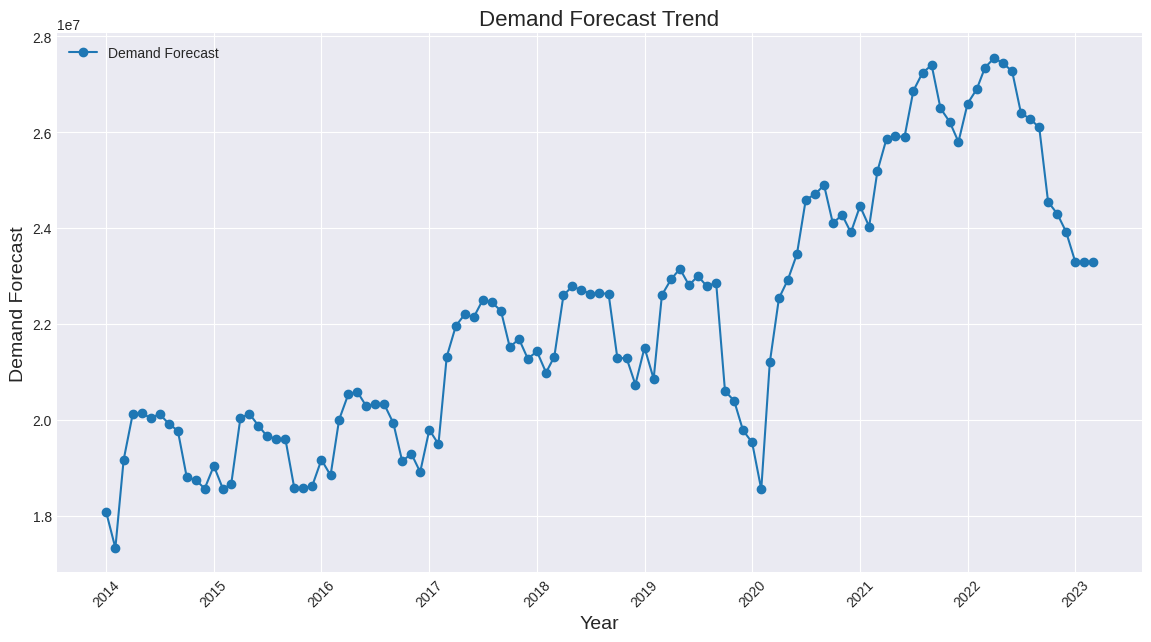

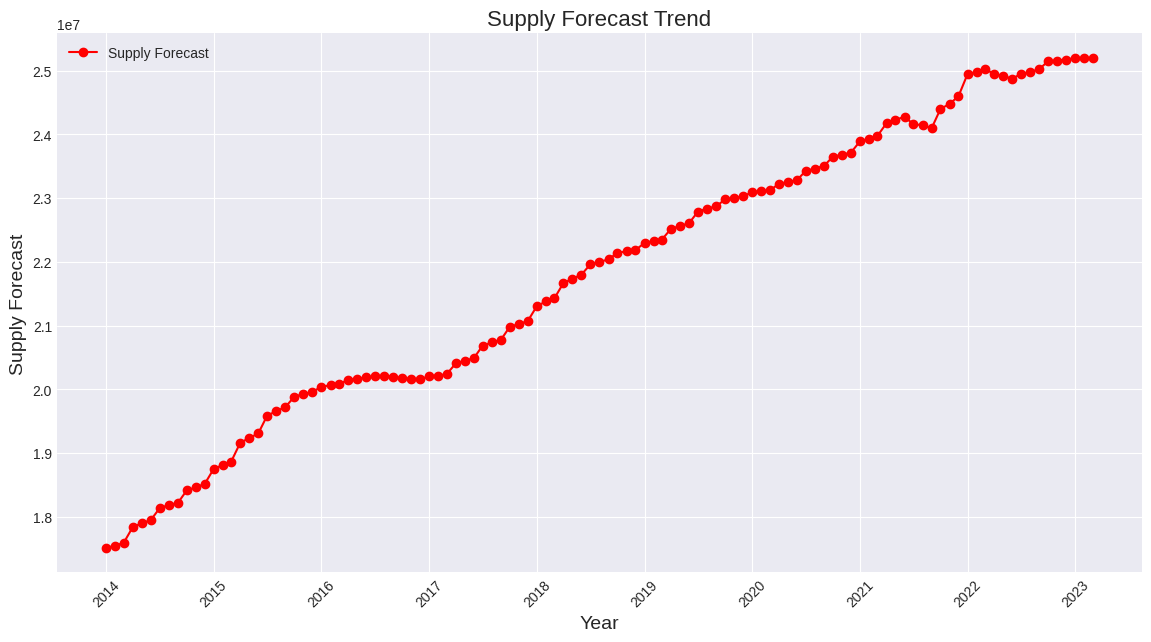

'/content/sample_data/4단계_업데이트.xlsx'

In [19]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt

# Setting the style of the plots
plt.style.use('seaborn-darkgrid')

# Plotting Demand Forecast
plt.figure(figsize=(14, 7))
plt.plot(data['YYYYMM'], data['DEMAND_FORECAST'], label='Demand Forecast', marker='o')
plt.title('Demand Forecast Trend', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Demand Forecast', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

# Plotting Supply Forecast
plt.figure(figsize=(14, 7))
plt.plot(data['YYYYMM'], data['SUPPLY_FORECAST'], label='Supply Forecast', color='red', marker='o')
plt.title('Supply Forecast Trend', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Supply Forecast', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

plt.show()

# Save the updated data to a new Excel file
updated_file_path = '/content/sample_data/4단계_업데이트.xlsx'
data.to_excel(updated_file_path, index=False)

updated_file_path


# **(단계 6)**
1)	데이터 읽기:
“복합SCFI2014_2023.xlsx”에서 2014년 1월부터 2023년 2월까지의 복합 SCFI 실적 데이터를 읽습니다.
2)	데이터 필드명 설정:
모든 엑셀 필드명은 영문으로 저장합니다.
최종 필드명으로 설정할 것은 10개 필드이다. YYYYMM, CH_EXP, ACTUAL_SHIP_CAPACITY, G_RELI, FLEET_DEV, DEMAND_SUPPLY_RATIO, DEMAND_FORECAST, SUPPLY_FORECAST, SCFI_C.
YYYYMM와 관련된 파생필드는 삭제합니다.
3)	데이터 병합 및 정리:
갱신된 MART 테이블을 기본 테이블로 설정하고, 복합 SCFI 필드를 왼쪽 병합(left join)하여 테이블을 갱신합니다.
년월 필드를 기준으로 데이터를 결합할 때 중복되지 않도록 주의합니다.
모든 데이터는 2021년 9월 이전을 실적, 2021년 10월 이후를 전망 데이터로 처리하며, 이는 하나의 필드에 저장됩니다.
4)	데이터 범위 및 필드 관리:
2023년 3월의 데이터는 제거하고, 2014년 1월부터 2023년 2월까지의 데이터만을 포함합니다.
모든 필드에서 결측치가 없는지 확인합니다.
5)	데이터 형식 유지:
년월 YYYYMM 필드는 "YYYY-MM" 형식으로 일관되게 저장하고 유지합니다.
6)	최종 데이터 저장:
검증된 데이터를 “전처리_SCFI.xlsx”로 저장합니다.

In [20]:
# Load the SCFI data from Excel
scfi_data_path = '/content/sample_data/복합SCFI2014_2023.xlsx'
scfi_data = pd.read_excel(scfi_data_path)

# Display the first few rows and data types of the SCFI data
scfi_data.head(), scfi_data.dtypes


(    YYYYMM    SCFI_C
 0  2014-01  1174.866
 1  2014-02  1069.362
 2  2014-03   969.145
 3  2014-04  1078.462
 4  2014-05  1137.112,
 YYYYMM     object
 SCFI_C    float64
 dtype: object)

In [21]:
# Ensure the 'YYYYMM' column in SCFI data is in datetime format for easy manipulation and merging
scfi_data['YYYYMM'] = pd.to_datetime(scfi_data['YYYYMM'], format='%Y-%m')

# Merge SCFI data with the previously loaded and updated MART data
data = data.merge(scfi_data, on='YYYYMM', how='left')

# Filtering the data to include only the required fields and the correct date range
required_fields = [
    'YYYYMM', 'CH_EXP', 'ACTUAL_SHIP_CAPACITY', 'G_RELI',
    'FLEET_DEV', 'DEMAND_SUPPLY_RATIO', 'DEMAND_FORECAST',
    'SUPPLY_FORECAST', 'SCFI_C'
]
filtered_data = data[(data['YYYYMM'] >= '2014-01-01') & (data['YYYYMM'] <= '2023-02-28')][required_fields]

# Check for missing values in the filtered data
missing_values_filtered = filtered_data.isnull().sum()

filtered_data.head(), missing_values_filtered


(      YYYYMM    CH_EXP  ACTUAL_SHIP_CAPACITY    G_RELI  FLEET_DEV  \
 0 2014-01-01  21790540          1.202993e+07  0.694882   17312194   
 1 2014-02-01   9977430          1.184171e+07  0.681136   17385239   
 2 2014-03-01  17115050          1.252467e+07  0.721154   17367549   
 3 2014-04-01  20089670          1.284886e+07  0.732795   17534040   
 4 2014-05-01  20500550          1.332980e+07  0.753047   17701139   
 
    DEMAND_SUPPLY_RATIO  DEMAND_FORECAST  SUPPLY_FORECAST    SCFI_C  
 0             1.258682     1.807036e+07     1.750807e+07  1174.866  
 1             0.573902     1.732633e+07     1.754725e+07  1069.362  
 2             0.985461     1.916355e+07     1.758775e+07   969.145  
 3             1.145752     2.012646e+07     1.783606e+07  1078.462  
 4             1.158149     2.013382e+07     1.789646e+07  1137.112  ,
 YYYYMM                  0
 CH_EXP                  0
 ACTUAL_SHIP_CAPACITY    0
 G_RELI                  0
 FLEET_DEV               0
 DEMAND_SUPPLY_RATIO  

In [22]:
# 코드 수정

# Convert 'YYYYMM' to string in the format "YYYY-MM" for display purposes
filtered_data['YYYYMM'] = filtered_data['YYYYMM'].dt.strftime('%Y-%m')

# Save the filtered and verified data to a new Excel file
final_file_path = '/content/sample_data/전처리_SCFI.xlsx'
filtered_data.to_excel(final_file_path, index=False)

final_file_path


'/content/sample_data/전처리_SCFI.xlsx'

# **(단계 7)**
2014년 1월부터 2021년 9월까지 아래 필드에 대해서 “복합SCFI_2021-09.xlsx”와 “전처리_SCFI.xlsx” 두 파일의 데이터가 모두 동일한지, YYYYMM 기준으로 정렬한 후 차이점을 확인합니다.
YYYYMM, CH_EXP, G_RELI, FLEET_DEV, SCFI_C

In [23]:
# Load the SCFI data up to September 2021
scfi_2021_data_path = '/content/sample_data/복합SCFI_2021-09.xlsx'
scfi_2021_data = pd.read_excel(scfi_2021_data_path)

# Load the preprocessed SCFI data
preprocessed_scfi_data_path = '/content/sample_data/전처리_SCFI.xlsx'
preprocessed_scfi_data = pd.read_excel(preprocessed_scfi_data_path)

# Filter both datasets for the specified date range and required fields
date_range = (pd.to_datetime('2014-01-01'), pd.to_datetime('2021-09-30'))
required_columns = ['YYYYMM', 'CH_EXP', 'G_RELI', 'FLEET_DEV', 'SCFI_C']

# Ensure YYYYMM is in datetime format
scfi_2021_data['YYYYMM'] = pd.to_datetime(scfi_2021_data['YYYYMM'], format='%Y-%m')
preprocessed_scfi_data['YYYYMM'] = pd.to_datetime(preprocessed_scfi_data['YYYYMM'], format='%Y-%m')

# Filter data within the date range
scfi_2021_filtered = scfi_2021_data[(scfi_2021_data['YYYYMM'] >= date_range[0]) & (scfi_2021_data['YYYYMM'] <= date_range[1])][required_columns]
preprocessed_scfi_filtered = preprocessed_scfi_data[(preprocessed_scfi_data['YYYYMM'] >= date_range[0]) & (preprocessed_scfi_data['YYYYMM'] <= date_range[1])][required_columns]

scfi_2021_filtered.head(), preprocessed_scfi_filtered.head()


(      YYYYMM    CH_EXP    G_RELI  FLEET_DEV    SCFI_C
 0 2014-01-01  21790540  0.694882   17312194  1174.866
 1 2014-02-01   9977430  0.681136   17385239  1069.362
 2 2014-03-01  17115050  0.721154   17367549   969.145
 3 2014-04-01  20089670  0.732795   17534040  1078.462
 4 2014-05-01  20500550  0.753047   17701139  1137.112,
       YYYYMM    CH_EXP    G_RELI  FLEET_DEV    SCFI_C
 0 2014-01-01  21790540  0.694882   17312194  1174.866
 1 2014-02-01   9977430  0.681136   17385239  1069.362
 2 2014-03-01  17115050  0.721154   17367549   969.145
 3 2014-04-01  20089670  0.732795   17534040  1078.462
 4 2014-05-01  20500550  0.753047   17701139  1137.112)

In [24]:
# Compare the two datasets to find any differences
comparison_result = scfi_2021_filtered.merge(preprocessed_scfi_filtered, on=required_columns, how='outer', indicator=True)

# Filter to show only the rows with differences
differences = comparison_result[comparison_result['_merge'] != 'both']

differences


,YYYYMM,CH_EXP,G_RELI,FLEET_DEV,SCFI_C,_merge
